In [3]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import dlib
import imutils
import os

In [4]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
os.getcwd()

'/Users/pareshar/Personal/Github/Facial-feature-detector'

Complex


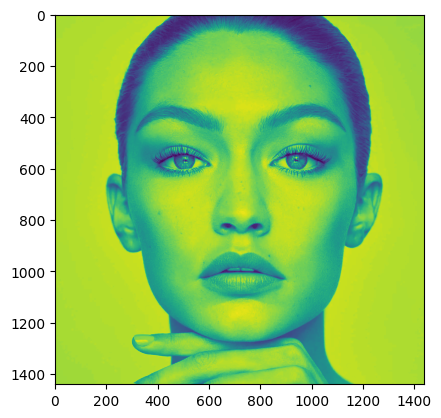

In [5]:
def compute_face_simplicity(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Parameters for LBP
    radius = 1
    n_points = 8 * radius
    
    # Apply LBP
    lbp = local_binary_pattern(img, n_points, radius, method="uniform")
    
    # Compute the histogram of the LBP
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # Measure the variance of the histogram
    variance = np.var(hist)
    
    # A hypothetical threshold - needs calibration
    threshold = 1000
    
    plt.imshow(img)
        
    if variance < threshold:
        return "Simple"
    else:
        return "Complex"

image_path = 'data/images_symmetry/gigi_hadid.webp'
print(compute_face_simplicity(image_path))


15596.518132262727
Complex


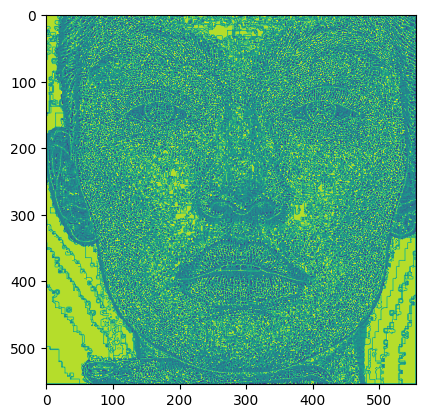

In [6]:
def compute_face_simplicity(image_path):
    # Load the image in grayscale
    # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=800)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("models/face_alignment/shape_predictor_68_face_landmarks.dat")
    
    # Detect the face in the image
    faces = detector(gray, 1)
    if len(faces) == 0:
        return "No face detected."

    x, y, w, h = (faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height())
    face_img = gray[y:y+h, x:x+w]
    
    
    # Parameters for LBP
    radius = 1
    n_points = 8 * radius
    
    # Apply LBP to the face region
    lbp = local_binary_pattern(face_img, n_points, radius, method="uniform")
    
    # Compute the histogram of the LBP
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # Measure the variance of the histogram
    variance = np.var(hist)
    std = np.sqrt(variance)
    print(std)
    
    # A hypothetical threshold - needs calibration
    threshold = 10000
    
    if std < threshold:
        simplicity = "Simple"
    else:
        simplicity = "Complex"
    
    # Visualizing the LBP pattern on the detected face
    plt.imshow(lbp)
    
    
    return simplicity

image_path = 'data/images_symmetry/gigi_hadid.webp'
print(compute_face_simplicity(image_path))


8373.626299280379
Simple


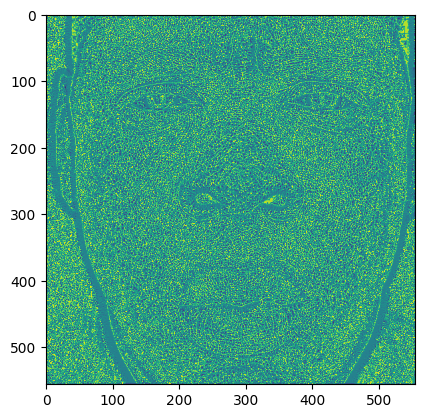

In [7]:
image_path = 'data/images_symmetry/jay_z.jpg'
print(compute_face_simplicity(image_path))

2106.165482577283
Simple


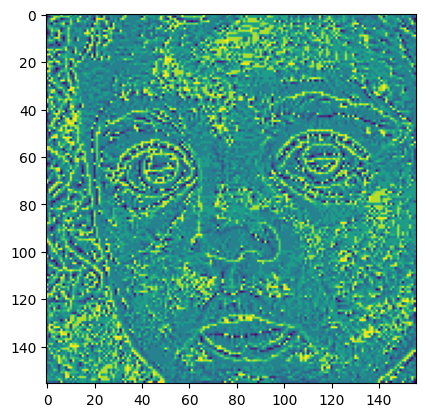

In [8]:
image_path = 'data/images_age_gender/4_6_boy.jpg'
print(compute_face_simplicity(image_path))

1542.681042860124
Simple


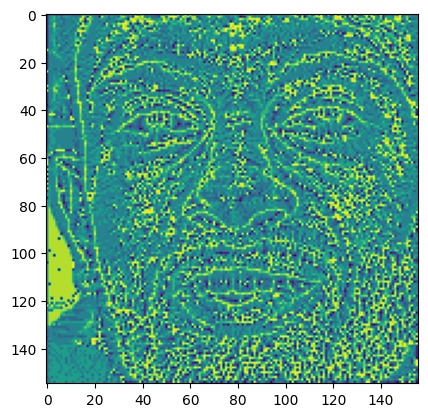

In [9]:
image_path = 'data/images_age_gender/22_me.jpg'
print(compute_face_simplicity(image_path))

4788.726110355446
Simple


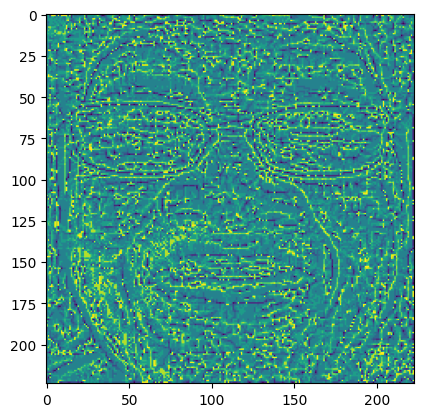

In [10]:
image_path = 'data/images_age_gender/60_100_woman_2.jpg'
print(compute_face_simplicity(image_path))

2777.3519924561238
Simple


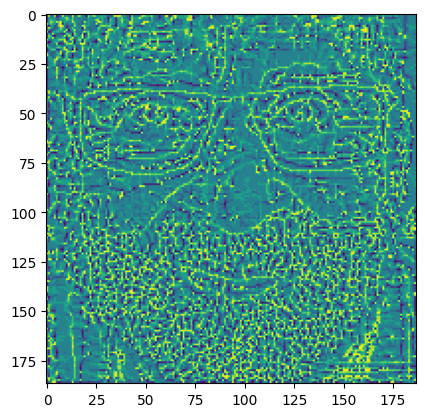

In [11]:
image_path = 'data/images_age_gender/60_100_man.jpg'
print(compute_face_simplicity(image_path))

703.154150951269
Simple


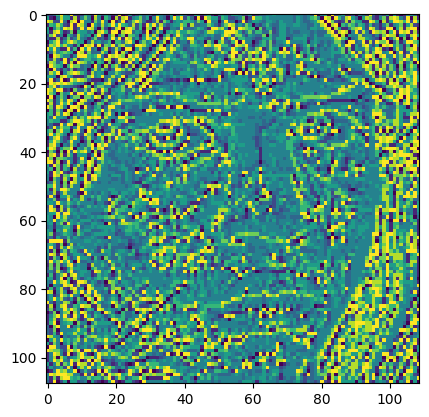

In [12]:
image_path = 'data/images_age_gender/4_6_girl.jpg'
print(compute_face_simplicity(image_path))